# Finding insights from our data

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Locate the csv file and read it - MIX info
url_2020 = "../butter_team_project/sql_merged_data/mix_2020_final.csv"
mix_20 = pd.read_csv(url_2020, sep = ',', index_col = False)

url_2019 = "../butter_team_project/sql_merged_data/mix_2019_final.csv"
mix_19 = pd.read_csv(url_2019, sep = ',', index_col = False)

# Locate the csv file and read it - CO2 info
url_2020 = "../butter_team_project/sql_merged_data/co2020.csv"
co2_20 = pd.read_csv(url_2020, sep = ',', index_col = False)

url_2019 = "../butter_team_project/sql_merged_data/co2019.csv"
co2_19 = pd.read_csv(url_2019, sep = ',', index_col = False)

In [3]:
df_20 = pd.DataFrame(co2_20)
df_19 = pd.DataFrame(co2_19)

In [4]:
# Create a new column with the total_value for both years
df_20["total_value"] = df_20["Value_type_1"] + df_20["Value_type_2"]
df_19["total_value"] = df_19["Value_type_1"] + df_19["Value_type_2"]

In [5]:
df_20.describe()

,Value_type_1,Value_type_2,total_value
count,167.000000,167.000000,167.000000
mean,194068.884041,455183.225715,649252.109755
std,49283.644283,82790.984075,95778.892215
min,8984.134766,12564.288086,21548.422852
25%,157227.281250,400775.593750,591035.453125
50%,182277.359375,451022.500000,641015.734375
75%,226755.375000,498152.546875,709896.835938
max,362985.875000,706640.312500,879951.203125


In [6]:
df_19.describe()

,Value_type_1,Value_type_2,total_value
count,166.000000,166.000000,166.000000
mean,265303.696336,433853.959431,699157.655768
std,68800.035402,77934.481048,90818.002834
min,10358.357422,16595.703125,26954.060547
25%,214900.304688,387622.765625,650972.257812
50%,259634.046875,431902.687500,694072.375000
75%,307652.781250,466760.203125,733011.039062
max,463073.312500,669284.375000,905343.468750


## Average CO2 emissions 2019 vs 2020

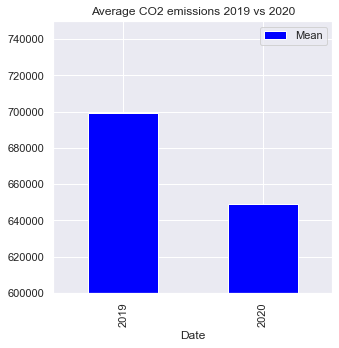

In [7]:
# Create a dataframe with the info needed
df_mean = pd.DataFrame(columns=['Date', 'Mean'])

df_mean["Date"] = [2019, 2020]
df_mean["Mean"] = [df_19.describe()['total_value']['mean'], df_20.describe()['total_value']['mean']]
df_mean

# Create a plot
fig, ax = plt.subplots(figsize = (5,5))
ax.set_title("Average CO2 emissions 2019 vs 2020")

df_mean.plot(kind='bar',x='Date',y='Mean', ax=ax, color="blue")
plt.ylim(600000, 750000);

## CO2 emission evolution 2019 vs 2020

In [72]:
# Create a new column with the month
months_20 = [df_20["Date"][row][5:7] for row in range(len(df_20))]
df_20["Month"] = months_20

months_19 = [df_19["Date"][row][5:7] for row in range(len(df_19))]
df_19["Month"] = months_19

# Group by month
df_g20 = df_20.groupby(by="Month").agg("sum")
df_g19 = df_19.groupby(by="Month").agg("sum")

# Flatten the column index
#df_g20.columns = df_g20.columns.get_level_values(0)
#df_g19.columns = df_g19.columns.get_level_values(0)

#df_g20.columns = [''.join(col).strip() for col in df_g20.columns.values]
#df_g20.columns

# Drop columns that we do not need
df_g20 = df_g20.drop(["Value_type_1"], axis=1).drop(["Value_type_2"], axis=1)
df_g19 = df_g19.drop(["Value_type_1"], axis=1).drop(["Value_type_2"], axis=1)

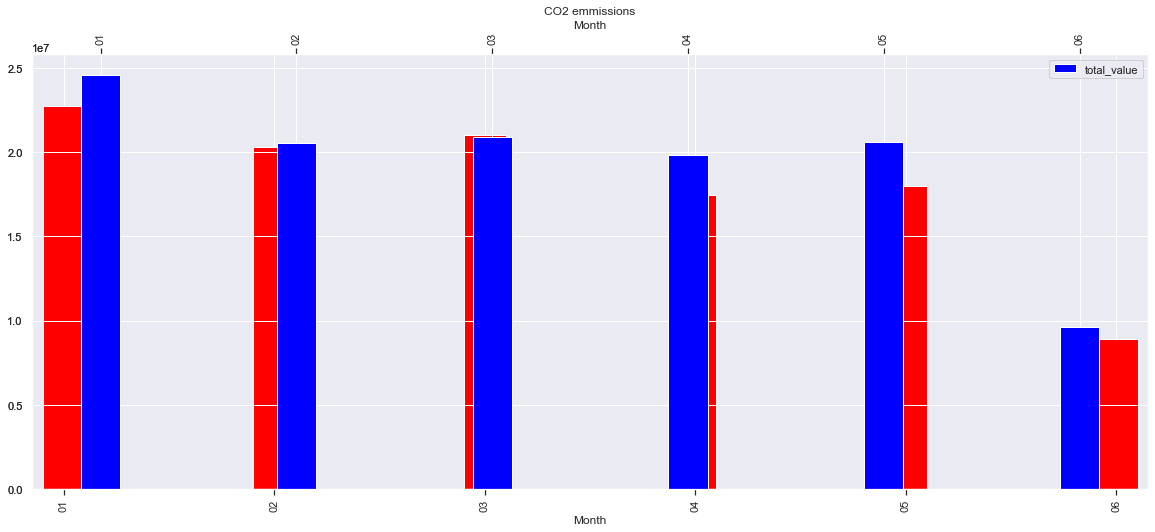

In [93]:
# Create a plot
fig, ax = plt.subplots(figsize = (20,8))
ax2 = ax.twiny()
ax2.set_xlim(1000)

df_g20.plot.bar(color="red", ax=ax, width=-0.2)
df_g19.plot.bar(color="blue", ax=ax2, width=0.2)

ax.set_title("CO2 emmissions");